In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

In [3]:
ser = Service('../chrome_dirver/chromedriver.exe')

driver = webdriver.Chrome(service = ser)

In [4]:
url = 'http://search.danawa.com/dsearch.php?k1=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&module=goods&act=dispMain'

driver.get(url)

In [5]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

---

In [25]:
len(soup.select('div.prod_info'))

42

In [6]:
len(soup.select('div.prod_info > p > a'))

42

In [7]:
name = soup.select('div.prod_info > p > a')

In [8]:
soup.select('div.prod_info > p > a')[0].text#.replace('\n','').replace('\t','')

'델로라 V11 파워 300W'

In [9]:
detail = soup.select('div > div.prod_info > dl > dd > div')

In [10]:
len(soup.select('div > div.prod_info > dl > dd > div'))

42

In [11]:
soup.select('div > div.prod_info > dl > dd > div')[0].text.replace('\n','').replace('\t','')

'핸디/스틱청소기  / 핸디+스틱형  / 무선형  / 흡입전용 / 소비전력 : 300W  / [성능] 흡입력 : 22000Pa  / 싸이클론  / BLDC모터  / [배터리] 충전시간 : 5시간  / 사용시간(개당) : 1시간10분  / 분리형 (1개)  / 리튬이온  / [필터] 헤파필터  / 4단계여과  / [기능] LED라이트  / [구성] 바닥  / 침구  / 솔형  / 틈새  / 연장툴  / 거치대  / [부가] 먼지통용량 : 0.6L  / 색상 : 레드, 블랙  / 무게 : 3.89kg  / 크기(가로x세로x깊이): 239x1255x105mm'

In [12]:
price = soup.select('div > div.prod_pricelist')

In [13]:
price[0].text

'\n\n\n\n\t\t\t\t\t\t\t\t\t\t82몰\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n상품비교\n\n\n\n\n\n\n104,990원\n\n가격정보 더보기\n\n\n\n\n\n\n'

In [14]:
len(soup.select('div > div.prod_pricelist'))

42

In [17]:
price_0 = soup.select('div > div.prod_pricelist')[4].text.replace('\n','').replace('\t','')

In [18]:
price_0#.split('원')[0].split('교')[1]

'13몰상품비교59,840원가격정보 더보기'

In [19]:
names = []
details = []
prices = []

for nm in name:
    prod_name = nm.text
    names.append(prod_name)

for dt in detail:
    prod_detail = dt.text.replace('\n','').replace('\t','')
    details.append(prod_detail)

for pri in price:
    prod_price = pri.text.replace('\n','').replace('\t','')
    try:
        prod_price = prod_price.split('원')[0].split('교')[1]
    except:
        prod_price = prod_price.split('원')[0]
    prices.append(prod_price)    
    
names[:5]

['델로라 V11 파워 300W',
 'LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571',
 '삼성전자 비스포크 제트 VS20A956A3',
 'LG전자 코드제로 ThinQ A9S AS9370IKT',
 '샤오미 CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매)']

In [20]:
details[:5]

['핸디/스틱청소기  / 핸디+스틱형  / 무선형  / 흡입전용 / 소비전력 : 300W  / [성능] 흡입력 : 22000Pa  / 싸이클론  / BLDC모터  / [배터리] 충전시간 : 5시간  / 사용시간(개당) : 1시간10분  / 분리형 (1개)  / 리튬이온  / [필터] 헤파필터  / 4단계여과  / [기능] LED라이트  / [구성] 바닥  / 침구  / 솔형  / 틈새  / 연장툴  / 거치대  / [부가] 먼지통용량 : 0.6L  / 색상 : 레드, 블랙  / 무게 : 3.89kg  / 크기(가로x세로x깊이): 239x1255x105mm',
 '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (2개) / 리튬이온 / [필터] 분리형배기필터 / 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [부가] 색상: 카밍베이지 / 무게: 2.6kg / 크기(가로x세로x깊이): 250x1120x260mm',
 '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: 210W / 제트싸이클론 / 디지털인버터모터 / [배터리] 충전시간: 3시간30분 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 5단계여과 / [기능] 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / 자동먼지비움 / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [부가] 먼지통용량: 0.5L / 색상: 미스티화이트 / 무게: 2.5kg / 액세서리크래들  / 크기(가로x세로x깊이): 250x930x202mm',
 '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력:

In [21]:
prices[:5]

['104,990', '1,055,140', '566,410', '784,540', '59,840']

In [22]:
prices_int = list(map(lambda x: int(x.replace(',','')),prices))
prices_int[:5]

[104990, 1055140, 566410, 784540, 59840]

In [23]:
danawaWireless_df = pd.DataFrame(
    {'제품명':names,'설명':details,'가격':prices_int}
                             )
danawaWireless_df

,제품명,설명,가격
0,델로라 V11 파워 300W,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입전용 / 소비전력 : 300...,104990
1,LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W...,1055140
2,삼성전자 비스포크 제트 VS20A956A3,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: ...,566410
3,LG전자 코드제로 ThinQ A9S AS9370IKT,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W...,784540
4,샤오미 CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),"차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...",59840
5,삼성전자 비스포크 제트 VS20A957E3,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: ...,923670
6,So6kDl9Xib,So6kDl9Xib930976,930976
7,샤오미 TROUVER POWER 11,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입전용 / 소비전력: 400W / ...,73950
8,베이스어스 차량용 청소기 A3 (해외구매),"차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필...",49900
9,샤오미 드리미 V10,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입전용 / 소비전력: 450W / ...,155700


In [157]:
danawaWireless_df.to_excel('./files/1_danawa_crawling_result_study.xlsx',
                          index = False)

---

In [35]:
prod_items = soup.select('div.prod_main_info')
prod_items[0]

<div class="prod_main_info">
<div class="thumb_info">
<div class="thumb_image">
<a class="thumb_link click_log_product_adReader_img_" data-sale-seq="" href="http://prod.danawa.com/info/?pcode=9967452&amp;keyword=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&amp;cate=102207" id="thumbLink_9967452_adLeader" onmousedown="_trkEventLog('통합검색_광고상품_델로라 V11 파워 300W');" target="_blank">
<img alt="델로라 V11 파워 300W" onerror="this.onerror=null; this.src='//img.danawa.com/new/noData/img/noImg_160.gif';" src="//img.danawa.com/prod_img/500000/452/967/img/9967452_1.jpg?shrink=130:130&amp;_v=20211224085918"/>
</a>
<a class="btn_view_zoom" data-assemblygallerycategory="N" href="#" id="imageZoom_9967452_adLeader" onclick="return false;"><span class="ico i_zoom_vw"></span>이미지보기</a>
</div>
<div class="img_selector">
<a class="sel_item" href="#" onclick="return false;" title="상품 색상">
<span class="hide_indent" style="background-color:#000000;">상품 색상</span>
</a>
<a class="sel_item" href="#" onclick="return fal

In [36]:
prod_items[0].select('p>a')[0].text

'델로라 V11 파워 300W'

In [37]:
prod_items[0].select('dl > dd > div')[0].text.replace('\n','').replace('\t','')

'핸디/스틱청소기  / 핸디+스틱형  / 무선형  / 흡입전용 / 소비전력 : 300W  / [성능] 흡입력 : 22000Pa  / 싸이클론  / BLDC모터  / [배터리] 충전시간 : 5시간  / 사용시간(개당) : 1시간10분  / 분리형 (1개)  / 리튬이온  / [필터] 헤파필터  / 4단계여과  / [기능] LED라이트  / [구성] 바닥  / 침구  / 솔형  / 틈새  / 연장툴  / 거치대  / [부가] 먼지통용량 : 0.6L  / 색상 : 레드, 블랙  / 무게 : 3.89kg  / 크기(가로x세로x깊이): 239x1255x105mm'

In [47]:
prod_items[0].select('div.prod_pricelist')[0].text.replace('\n','').replace('\t','').split('원')[0].split('교')[1]

'104,990'

In [49]:
prod_items[6].select('div.prod_pricelist')[0].text.replace('\n','').replace('\t','').split('원')[0]

'930976'

In [80]:
def get_prod_items(prod_items):
    prod_lists = []

    for prod_item in prod_items:
        name = prod_item.select('p>a')[0].text
        detail = prod_item.select('dl > dd > div')[0].text.replace('\n','').replace('\t','')
        try :
            price = prod_item.select('div.prod_pricelist')[0].text.replace('\n','').replace('\t','').split('원')[0].split('교')[1]
        except:
            price = prod_item.select('div.prod_pricelist')[0].text.replace('\n','').replace('\t','').split('원')[0]
        price = int(price.replace(",",''))
            
        myList = [name,detail,price]
        prod_lists.append(myList)

    return prod_lists

In [79]:
prod_lists = []

for prod_item in prod_items:
    name = prod_item.select('p>a')[0].text
    detail = prod_item.select('dl > dd > div')[0].text.replace('\n','').replace('\t','')
    try :
        price = prod_item.select('div.prod_pricelist')[0].text.replace('\n','').replace('\t','').split('원')[0].split('교')[1]
    except:
        price = prod_item.select('div.prod_pricelist')[0].text.replace('\n','').replace('\t','').split('원')[0]
    price = int(price.replace(",",''))
        
    myList = [name,detail,price]
    prod_lists.append(myList)

prod_lists

[['쿠쿠전자 CVC-B1020UG',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입전용 / [성능] 싸이클론 / BLDC모터 / 사용시간(개당): 33분 / [필터] 헤파필터 / H13급 / 4단계여과 / [기능] 배터리잔량표시 / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 거치대 / [부가] 색상: 매트그레이 / 무게: 2.7kg / 크기(가로x세로x깊이): 240x1170x260mm',
  188330],
 ['툴앤툴 네오스틱 NEW T5',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 소비전력: 160W / [성능] 흡입력: 18000Pa / 싸이클론 / [배터리] 충전시간: 3~4시간 / 사용시간(개당): 35분 / 리튬이온 / [필터] 헤파필터 / H14급 / 4단계여과 / [기능] LED라이트 / 프리볼트 / [구성] 바닥 / 솔형 / 연장툴 / 거치대 / [부가] 먼지통용량: 0.65L / 색상: 모던화이트 / 무게: 1.97kg / 크기(가로x세로x깊이): 250x1210x220mm',
  109000],
 ['p7WPOJQlel', 'p7WPOJQlel365841', 365841],
 ['지웰 벤투스 아쿠아',
  '물걸레청소기 / 스틱형 / 물걸레+진공 / 회전식 / 무선형 / 배터리: 리튬이온 / 충전시간: 4~5시간 / 사용시간(개당): 30분 / [부가] 색상: 화이트+블루, 네이비 / 무게: 3kg / 브러쉬: 바닥, 물걸레',
  160650],
 ['스마트에버 S250W',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입전용 / 소비전력: 250W / [성능] 흡입력: 20000Pa / 싸이클론 / BLDC모터 / [배터리] 충전시간: 4시간30분 / 사용시간(개당): 25분 / 분리형 (1개) / [필터] 헤파필터 / H13급 / 4단계여과 / [기능] 프리볼트 / [구성] 바닥 / [부가] 먼지통용량: 0.5L / 색상: 퍼플 / 무게: 1.46kg / 크기(가로x세로x깊이): 240x1010x4

---

In [ ]:
# http://search.danawa.com/dsearch.php?query=무선청소기&originalQuery=무선청소기&volumeType=allvs&page=1&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390097&tab=goods
# http://search.danawa.com/dsearch.php?query=무선청소기&originalQuery=무선청소기&volumeType=allvs&page=2&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390097&tab=goods
# http://search.danawa.com/dsearch.php?query=무선청소기&originalQuery=무선청소기&volumeType=allvs&page=3&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390097&tab=goods

#url = 'http://search.danawa.com/dsearch.php?query={}&originalQuery={}&volumeType=allvs&page={}&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390097&tab=goods'.format(keyword,keyword,page)


In [42]:
def get_search_page_url(keyword, page):
    
    url = 'http://search.danawa.com/dsearch.php?query={}&originalQuery={}&volumeType=allvs&page={}&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390097&tab=goods'.format(keyword,keyword,page)

    return url

In [43]:
get_search_page_url('무선청소기','1')

'http://search.danawa.com/dsearch.php?query=무선청소기&originalQuery=무선청소기&volumeType=allvs&page=1&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390097&tab=goods'

In [44]:
import time
from tqdm import tqdm_notebook

In [70]:
from tqdm import notebook

In [81]:
keyword = '무선청소기'
total_page = 10
prod_data_total = []

for page in notebook.tqdm(range(1,total_page+1)):
# for page in tqdm_notebook(range(1,total_page+1)):
    driver.get(get_search_page_url(keyword,page))
    time.sleep(3)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    prod_items = soup.select('div.prod_main_info')
    prod_item_list = get_prod_items(prod_items)
    
    prod_data_total = prod_data_total + prod_item_list

  0%|          | 0/10 [00:00<?, ?it/s]

In [82]:
prod_data_total

[['델로라 V11 파워 300W',
  '핸디/스틱청소기  / 핸디+스틱형  / 무선형  / 흡입전용 / 소비전력 : 300W  / [성능] 흡입력 : 22000Pa  / 싸이클론  / BLDC모터  / [배터리] 충전시간 : 5시간  / 사용시간(개당) : 1시간10분  / 분리형 (1개)  / 리튬이온  / [필터] 헤파필터  / 4단계여과  / [기능] LED라이트  / [구성] 바닥  / 침구  / 솔형  / 틈새  / 연장툴  / 거치대  / [부가] 먼지통용량 : 0.6L  / 색상 : 레드, 블랙  / 무게 : 3.89kg  / 크기(가로x세로x깊이): 239x1255x105mm',
  104990],
 ['LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (2개) / 리튬이온 / [필터] 분리형배기필터 / 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [부가] 색상: 카밍베이지 / 무게: 2.6kg / 크기(가로x세로x깊이): 250x1120x260mm',
  1055260],
 ['삼성전자 비스포크 제트 VS20A956A3',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: 210W / 제트싸이클론 / 디지털인버터모터 / [배터리] 충전시간: 3시간30분 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 5단계여과 / [기능] 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / 자동먼지비움 / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [부가] 먼지통용량: 0.5L / 색상: 미스티화이트 

In [109]:
data = pd.DataFrame(prod_data_total)
data.columns = ['상품명','스펙 목록','가격']
data

,상품명,스펙 목록,가격
0,델로라 V11 파워 300W,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입전용 / 소비전력 : 300...,104990
1,LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W...,1055260
2,삼성전자 비스포크 제트 VS20A956A3,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: ...,566410
3,LG전자 코드제로 ThinQ A9S AS9370IKT,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W...,784550
4,샤오미 CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),"차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...",59840
...,...,...,...
406,테팔 에어포스 라이트 TY6545KL,핸디/스틱청소기 / 스틱형 / 무선형 / [성능] 싸이클론 / [배터리] 충전시간:...,108330
407,스윙 파워스윙 SWING-8000,핸디/스틱청소기 / 스틱형 / 무선형 / 물걸레 / 소비전력: 17W / [배터리]...,474050
408,이나프 ILVH-1000,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / [배터리] 충전시간: 8~10시간 /...,38900
409,일렉트로룩스 퓨어 F9 PF91-5EBF,핸디/스틱청소기 / 스틱형 / 무선형 / 흡입전용 / [배터리] 충전시간: 6시간 ...,242710


In [110]:
data.to_excel('./files/1_danawa_crawling_result_class.xlsx',
                           index = False)

---
**mission**
  1. 제조사 떼내기
  2. product 의 분류 떼내기
  3. 사용시간
  4. 흡입력
---

In [111]:
data.head()

,상품명,스펙 목록,가격
0,델로라 V11 파워 300W,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입전용 / 소비전력 : 300...,104990
1,LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W...,1055260
2,삼성전자 비스포크 제트 VS20A956A3,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: ...,566410
3,LG전자 코드제로 ThinQ A9S AS9370IKT,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W...,784550
4,샤오미 CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),"차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...",59840


In [117]:
data['상품명'].str.split(' ',1)

0                            [델로라, V11 파워 300W]
1          [LG전자, 오브제컬렉션 코드제로 ThinQ A9S AO9571]
2                    [삼성전자, 비스포크 제트 VS20A956A3]
3              [LG전자, 코드제로 ThinQ A9S AS9370IKT]
4      [샤오미, CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매)]
                         ...                   
406                     [테팔, 에어포스 라이트 TY6545KL]
407                       [스윙, 파워스윙 SWING-8000]
408                            [이나프, ILVH-1000]
409                   [일렉트로룩스, 퓨어 F9 PF91-5EBF]
410                              [오아, OA-CL010]
Name: 상품명, Length: 411, dtype: object

In [118]:
data['상품명'][0].split(' ',1)

['델로라', 'V11 파워 300W']

In [189]:
company_list = []
product_list = []

for title in data['상품명']:
    try:
        title_info = title.split(' ',1)
        company_name = title_info[0]
        product_name = title_info[1]

        company_list.append(company_name)
        product_list.append(product_name)
    except :
        company_list.append(None)
        product_list.append(None)

print(company_list[:5])
print(product_list[:5])

['델로라', 'LG전자', '삼성전자', 'LG전자', '샤오미']
['V11 파워 300W', '오브제컬렉션 코드제로 ThinQ A9S AO9571', '비스포크 제트 VS20A956A3', '코드제로 ThinQ A9S AS9370IKT', 'CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매)']


In [190]:
len(company_list)

411

In [191]:
len(product_list)

411

---

In [126]:
sort_list = []

for spec in data['스펙 목록']:
    try:
        finds = spec.find('기')
        sort = spec[:finds+1]
        sort_list.append(sort)
    except :
        pass

print(len(sort_list))
print(sort_list[:5])

411
['핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '차량용청소기']


In [120]:
data['스펙 목록'].str.find('기')

0      7
1      7
2      7
3      7
4      5
      ..
406    7
407    7
408    7
409    7
410    7
Name: 스펙 목록, Length: 411, dtype: int64

In [121]:
data['스펙 목록'][0].find('기')

7

In [123]:
data['스펙 목록'][0][:data['스펙 목록'][0].find('기')+1]

'핸디/스틱청소기'

---

In [154]:
spec_lists = data['스펙 목록'][0].split(' / ')

category = spec_lists[0].strip()

category

'핸디/스틱청소기'

In [155]:
spec_lists

['핸디/스틱청소기 ',
 '핸디+스틱형 ',
 '무선형 ',
 '흡입전용',
 '소비전력 : 300W ',
 '[성능] 흡입력 : 22000Pa ',
 '싸이클론 ',
 'BLDC모터 ',
 '[배터리] 충전시간 : 5시간 ',
 '사용시간(개당) : 1시간10분 ',
 '분리형 (1개) ',
 '리튬이온 ',
 '[필터] 헤파필터 ',
 '4단계여과 ',
 '[기능] LED라이트 ',
 '[구성] 바닥 ',
 '침구 ',
 '솔형 ',
 '틈새 ',
 '연장툴 ',
 '거치대 ',
 '[부가] 먼지통용량 : 0.6L ',
 '색상 : 레드, 블랙 ',
 '무게 : 3.89kg ',
 '크기(가로x세로x깊이): 239x1255x105mm']

In [156]:
for spec in spec_lists:
    if '사용시간' in spec:
        use_time_spec = spec
    elif '흡입력' in spec:
        suction_spec = spec
    elif '청소기' in spec:
        category = spec
        
print(use_time_spec)
print(suction_spec)
print(category)

use_time_spec.split(':')[1].strip()
suction_spec.split(':')[1].strip()

사용시간(개당) : 1시간10분 
[성능] 흡입력 : 22000Pa 
핸디/스틱청소기 


'22000Pa'

In [158]:
category_list = []
use_time_list = []
suction_list = []

for spec_data in data['스펙 목록']:
    spec_lists = spec_data.split(' / ')
    
    category = spec_lists[0].strip()
    category_list.append(category)
    
    for spec in spec_lists:
        if '사용시간' in spec:
            use_time_spec = spec

        elif '흡입력' in spec:
            suction_spec = spec
            
    use_time_value = use_time_spec.split(':')[1].strip()
    use_time_list.append(use_time_value)
    
    suction_value = suction_spec.split(':')[1].strip()
    suction_list.append(suction_value)

In [159]:
print(category_list[:5])
print(use_time_list[:5])
print(suction_list[:5])

['핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '차량용청소기']
['1시간10분', '1시간', '1시간', '1시간', '30분']
['22000Pa', '210W', '210W', '210W', '16,800Pa']


In [163]:
mytime = '1시간30분'
int(mytime.split('시간')[0])*60
times = int(mytime.split('시간')[0])*60 + int(mytime.split('시간')[-1].replace('분',''))
times

90

In [164]:
def convert_time_minute(time):
    
    try:
        if '시간' in time:
            hour = time.split('시간')[0]
        
            if '분' in time:
                minute = time.split('시간')[-1].split('분')[0]
            else:
                minute = 0            
           
        else:
            hour = 0        
            minute = time.split('분')[0] 
            
        return int(hour)*60 + int(minute)
    
    except:
        return None

In [166]:
convert_time_minute('1시간40분')

100

In [171]:
new_use_time_list = []
for time in use_time_list:
    value = convert_time_minute(time)
    new_use_time_list.append(value)
    
new_use_time_list[:10]

[70, 60, 60, 60, 30, 60, 60, 60, 45, 60]

In [172]:
suction_list[:20]

['22000Pa',
 '210W',
 '210W',
 '210W',
 '16,800Pa',
 '210W',
 '210W',
 '20000Pa',
 '15,000Pa',
 '22000Pa',
 '210W',
 '210W',
 '210W',
 '151AW',
 '140W',
 '210W',
 '210W',
 '13,000Pa',
 '8,000Pa',
 '22000Pa']

In [184]:
def get_suction(value):
    try:
        value = value.upper()
        
        if "AW" in value or "W" in value:
            result = value.replace("A","").replace("W","").replace(",","")
            result = int(result)
        elif "PA" in value:
            result = value.replace("PA","").replace(",","")
            result = round(int(result)/100)
        else:
            result = None
        return result
    except:
        return None

In [185]:
new_suction_list = []
for power in suction_list:
    value = get_suction(power)
    new_suction_list.append(value)

new_suction_list[:20]

[220,
 210,
 210,
 210,
 168,
 210,
 210,
 200,
 150,
 220,
 210,
 210,
 210,
 151,
 140,
 210,
 210,
 130,
 80,
 220]

In [204]:
pd_data = pd.DataFrame()
pd_data['카테고리'] = category_list
pd_data['회사명'] = company_list
pd_data['제품'] = product_list
pd_data['가격'] = data['가격']
pd_data['사용시간'] = new_use_time_list
pd_data['흡입력']= new_suction_list
pd_data.head(10)

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,델로라,V11 파워 300W,104990,70.0,220.0
1,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1055260,60.0,210.0
2,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A956A3,566410,60.0,210.0
3,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S AS9370IKT,784550,60.0,210.0
4,차량용청소기,샤오미,CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),59840,30.0,168.0
5,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A957E3,903110,60.0,210.0
6,ONRv3YpnIo44313,None,None,44313,60.0,210.0
7,핸디/스틱청소기,샤오미,TROUVER POWER 11,73950,60.0,200.0
8,차량용청소기,베이스어스,차량용 청소기 A3 (해외구매),49880,45.0,150.0
9,핸디/스틱청소기,샤오미,드리미 V10,155700,60.0,220.0


---

In [251]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    411 non-null    object 
 1   회사명     401 non-null    object 
 2   제품      401 non-null    object 
 3   가격      411 non-null    int64  
 4   사용시간    394 non-null    float64
 5   흡입력     404 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 19.4+ KB


In [253]:
pd_data_dropna = pd_data
pd_data_dropna = pd_data_dropna[pd_data_dropna.notna()['제품']]
pd_data_dropna.to_excel('./files/2_danawa_data_final_study.xlsx',
                       index = False)

In [252]:
pd_data_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 0 to 410
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    401 non-null    object 
 1   회사명     401 non-null    object 
 2   제품      401 non-null    object 
 3   가격      401 non-null    int64  
 4   사용시간    385 non-null    float64
 5   흡입력     394 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 21.9+ KB


---

In [254]:
condition = (pd_data['카테고리'] == '핸디/스틱청소기')

pd_data_final = pd_data[condition]
len(pd_data_final)

pd_data_final.dropna(inplace = True)

pd_data_final.to_excel('./files/2_danawa_data_final_class.xlsx',
                      index = False)
pd_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 410
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    284 non-null    object 
 1   회사명     284 non-null    object 
 2   제품      284 non-null    object 
 3   가격      284 non-null    int64  
 4   사용시간    284 non-null    float64
 5   흡입력     284 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 15.5+ KB


C:\Users\OWNER\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [255]:
danawa_data = pd.read_excel('./files/2_danawa_data_final_class.xlsx')
danawa_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,델로라,V11 파워 300W,104990,70,220
1,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1055260,60,210
2,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A956A3,566410,60,210
3,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S AS9370IKT,784550,60,210
4,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A957E3,903110,60,210


In [257]:
top_list = danawa_data.sort_values(['흡입력'], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
151,핸디/스틱청소기,리하스,LH20,184000,120,330
219,핸디/스틱청소기,비브르,스톰파워 VE35,235000,50,310
138,핸디/스틱청소기,아이닉,NEW i20,188000,50,300
18,핸디/스틱청소기,DIBEA,차이슨 ALLNEW29000,248000,48,290
240,핸디/스틱청소기,블랙앤데커,PV1020,61470,11,290


In [258]:
top_list = danawa_data.sort_values(['사용시간'], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
151,핸디/스틱청소기,리하스,LH20,184000,120,330
22,핸디/스틱청소기,샤오미,드리미 V12,282060,90,270
23,핸디/스틱청소기,샤오미,드리미 V11,194880,90,250
75,핸디/스틱청소기,샤오미,드리미 T30,399000,90,270
275,핸디/스틱청소기,샤오미,드리미 V12 프로,408270,85,270


In [261]:
price_mean_value = danawa_data['가격'].mean()
suction_mean_value = danawa_data['흡입력'].mean()
use_time_mean_value = danawa_data['사용시간'].mean()
print("가격 평균값", price_mean_value)
print("흡입력 평균값", suction_mean_value)
print("사용시간 평균값", use_time_mean_value)

가격 평균값 370563.27464788733
흡입력 평균값 168.83802816901408
사용시간 평균값 43.933098591549296


In [263]:
condition_data = danawa_data [
    (danawa_data['가격'] <= price_mean_value) & 
    (danawa_data['흡입력'] >= suction_mean_value) & 
    (danawa_data['사용시간'] >= use_time_mean_value)]
condition_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 270
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   카테고리    55 non-null     object
 1   회사명     55 non-null     object
 2   제품      55 non-null     object
 3   가격      55 non-null     int64 
 4   사용시간    55 non-null     int64 
 5   흡입력     55 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 3.0+ KB


In [260]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns

rc('font',family = 'Malgun Gothic')

In [267]:
suction_max_value = danawa_data['흡입력'].max()
suction_mean_value = danawa_data['흡입력'].mean()
use_time_max_value = danawa_data['사용시간'].max()
use_time_mean_value = danawa_data['사용시간'].mean()

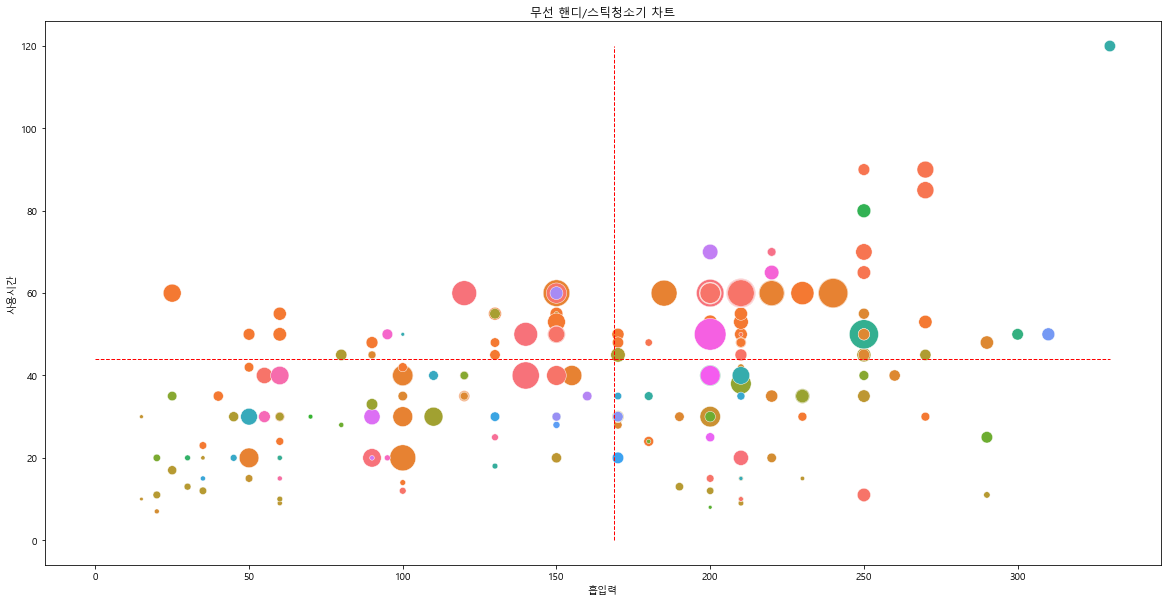

In [269]:
plt.figure(figsize=(20, 10))
plt.title("무선 핸디/스틱청소기 차트")
sns.scatterplot(x = '흡입력', y = '사용시간', size = '가격', hue = danawa_data['회사명'], 
             data = danawa_data, sizes = (10, 1000), legend = False)
plt.plot([0, suction_max_value], 
          [use_time_mean_value, use_time_mean_value], 
          'r--', 
          lw = 1 )
plt.plot([suction_mean_value, suction_mean_value], 
          [0, use_time_max_value], 
          'r--', 
          lw = 1 )
plt.show()

In [270]:
chart_data_selected = danawa_data[:20]

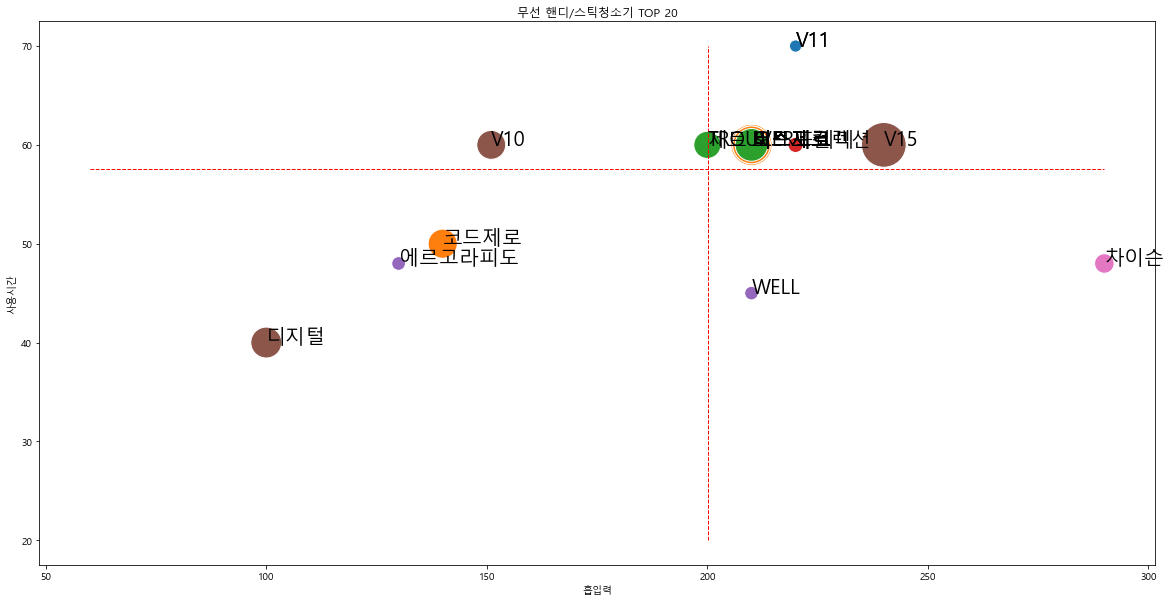

In [271]:
suction_max_value = chart_data_selected['흡입력'].max()
suction_mean_value = chart_data_selected['흡입력'].mean()
use_time_max_value = chart_data_selected['사용시간'].max()
use_time_mean_value = chart_data_selected['사용시간'].mean()
plt.figure(figsize=(20, 10))
plt.title("무선 핸디/스틱청소기 TOP 20")
sns.scatterplot(x = '흡입력', 
                  y = '사용시간', 
                  size = '가격', 
                  hue = chart_data_selected['회사명'], 
                  data = chart_data_selected, sizes = (100, 2000),
                  legend = False)
plt.plot([60, suction_max_value], 
          [use_time_mean_value, use_time_mean_value], 
          'r--', 
          lw = 1 )
plt.plot([suction_mean_value, suction_mean_value], 
          [20, use_time_max_value], 
          'r--', 
          lw = 1 )
for index, row in chart_data_selected.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    plt.text(x, y, s, size=20)
plt.show()